# Star Type Classification / NASA

NASA에서 수집한 별의 유형 분류 DataSet이다.

## Star Type Classification


For comparing all models of ML   
It can be used for prediction

Temperature -- K   
L -- L/Lo  
R -- R/Ro  
AM -- Mv  
Color -- General Color of Spectrum  
Spectral_Class -- O,B,A,F,G,K,M / SMASS - https://en.wikipedia.org/wiki/Asteroid_spectral_types  
Type -- Red Dwarf, Brown Dwarf, White Dwarf, Main Sequence , Super Giants, Hyper Giants  

TARGET:  
Type

from 0 to 5  

Red Dwarf - 0  
Brown Dwarf - 1  
White Dwarf - 2  
Main Sequence - 3  
Super Giants - 4  
Hyper Giants - 5

MATH:  

Lo = 3.828 x 10^26 Watts  
(Avg Luminosity of Sun)  
Ro = 6.9551 x 10^8 m  
(Avg Radius of Sun)  

## 요약
 요약
Calumns: 온도(K), 광도(L), 반지름(R), AM, 색상, 스펙트럼(Spectral Class), Type (분류)  

![Spectral_Class](https://scienceruls.weebly.com/uploads/5/1/7/4/51741831/846626525.GIF?448)

참고는 Kaggle에서   
https://www.kaggle.com/sohelranaccselab/star-type-classification-using-machine-learning  
https://www.kaggle.com/harshgupta57/star-type-eda-classifications

In [10]:
import pandas as pd
import numpy as np
import os

In [11]:
import matplotlib.pyplot as plt
DATA_PATH = os.path.join('data') # 데이터 저장 폴더

def load_star_data(): # wine data의 csv파일을 return하는 함수
    csv_path = os.path.join(DATA_PATH,'Stars.csv')
    return pd.read_csv(csv_path)

In [12]:
star = load_star_data()
star.info()
Type = star.Type # label만 미리 저장

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 240 entries, 0 to 239
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Temperature     240 non-null    int64  
 1   L               240 non-null    float64
 2   R               240 non-null    float64
 3   A_M             240 non-null    float64
 4   Color           240 non-null    object 
 5   Spectral_Class  240 non-null    object 
 6   Type            240 non-null    int64  
dtypes: float64(3), int64(2), object(2)
memory usage: 13.2+ KB


In [13]:
#Star 데이터에서 Categorical 한 Variable 들을 제거하여 분석
star = star.drop(['Color', 'Spectral_Class', 'Type'], axis=1)
star

,Temperature,L,R,A_M
0,3068,0.002400,0.1700,16.12
1,3042,0.000500,0.1542,16.60
2,2600,0.000300,0.1020,18.70
3,2800,0.000200,0.1600,16.65
4,1939,0.000138,0.1030,20.06
...,...,...,...,...
235,38940,374830.000000,1356.0000,-9.93
236,30839,834042.000000,1194.0000,-10.63
237,8829,537493.000000,1423.0000,-10.73
238,9235,404940.000000,1112.0000,-11.23


In [14]:
star.describe()

,Temperature,L,R,A_M
count,240.000000,240.000000,240.000000,240.000000
mean,10497.462500,107188.361635,237.157781,4.382396
std,9552.425037,179432.244940,517.155763,10.532512
min,1939.000000,0.000080,0.008400,-11.920000
25%,3344.250000,0.000865,0.102750,-6.232500
50%,5776.000000,0.070500,0.762500,8.313000
75%,15055.500000,198050.000000,42.750000,13.697500
max,40000.000000,849420.000000,1948.500000,20.060000


In [15]:
#대표적인 Scaler에는 MinMaxScaler, MaxAbsScaler, StandardScaler, RobusScaler 4가지가 있다. + Normalizer

from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import MaxAbsScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import Normalizer

In [16]:
MM = MinMaxScaler()
MA = MaxAbsScaler()
SS = StandardScaler()
RS = RobustScaler()
NO = Normalizer()

mm=pd.DataFrame(MM.fit_transform(star),columns=star.columns)
ma=pd.DataFrame(MA.fit_transform(star),columns=star.columns)
ss=pd.DataFrame(SS.fit_transform(star),columns=star.columns)
rs=pd.DataFrame(RS.fit_transform(star),columns=star.columns)
no=pd.DataFrame(NO.fit_transform(star),columns=star.columns)


<function matplotlib.pyplot.show(*args, **kw)>

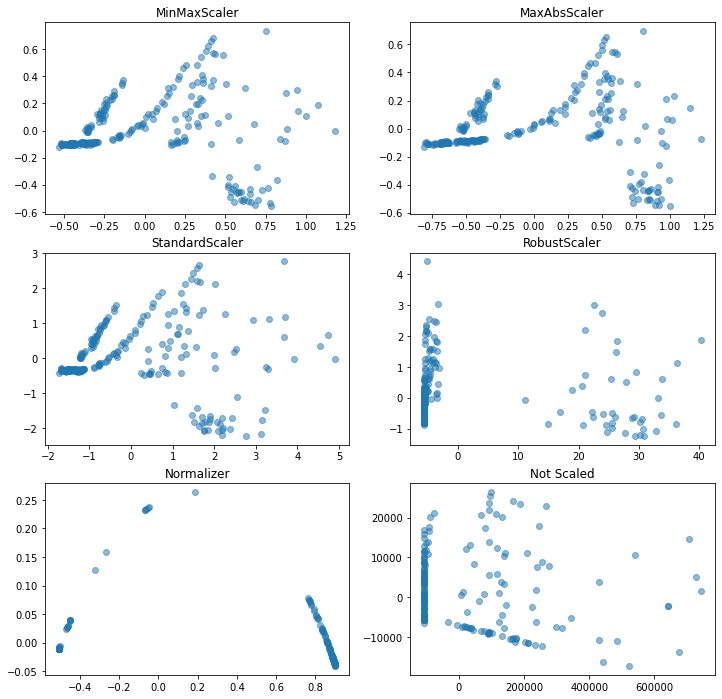

In [17]:
from sklearn.decomposition import PCA

# 각 정규화 된 값들을 PCA로 차원축소 시키고 값이 어떻게 변화하는지 살펴본다.

pca = PCA(n_components=2)

mm_pca = pca.fit_transform(mm)
ma_pca = pca.fit_transform(ma)
ss_pca = pca.fit_transform(ss)
rs_pca = pca.fit_transform(rs)
no_pca = pca.fit_transform(no)
ns_pca = pca.fit_transform(star)

mm_pca = pd.DataFrame(mm_pca, columns=['x','y'])
ma_pca = pd.DataFrame(ma_pca, columns=['x','y'])
ss_pca = pd.DataFrame(ss_pca, columns=['x','y'])
rs_pca = pd.DataFrame(rs_pca, columns=['x','y'])
no_pca = pd.DataFrame(no_pca, columns=['x','y'])
ns_pca = pd.DataFrame(ns_pca, columns=['x','y'])

plt.figure(figsize=(12, 12))

plt.subplot(321)
plt.scatter(mm_pca.x, mm_pca.y, alpha=0.5)
plt.title('MinMaxScaler')
plt.subplot(322)
plt.scatter(ma_pca.x, ma_pca.y, alpha=0.5)
plt.title('MaxAbsScaler')
plt.subplot(323)
plt.scatter(ss_pca.x, ss_pca.y, alpha=0.5)
plt.title('StandardScaler')
plt.subplot(324)
plt.scatter(rs_pca.x, rs_pca.y, alpha=0.5)
plt.title('RobustScaler')
plt.subplot(325)
plt.scatter(no_pca.x, no_pca.y, alpha=0.5)
plt.title('Normalizer')
plt.subplot(326)
plt.scatter(ns_pca.x, ns_pca.y, alpha=0.5)
plt.title('Not Scaled')

plt.show

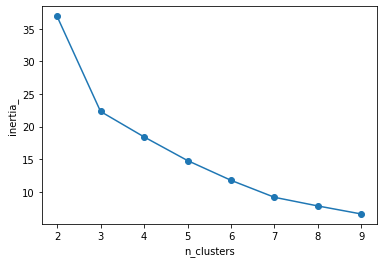

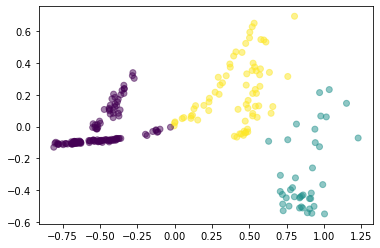

In [18]:
from sklearn.cluster import KMeans


def elbow(x):
    arr = []
    k_range = range(2,10)
    for k in k_range:
        km = KMeans(n_clusters=k, random_state=1)
        km.fit(x)
        arr.append(km.inertia_)
    return arr

arr = elbow(ma)

plt.plot(range(2,10), arr, marker='o')
plt.xlabel('n_clusters')
plt.ylabel('inertia_')
plt.show()

km = KMeans(n_clusters=3, random_state=1)
km.fit(ma_pca)
predict = pd.DataFrame(km.predict(ma_pca),columns=['predict'])
predict = pd.concat([ma_pca,predict],axis=1)

plt.scatter(predict.x, predict.y, alpha=0.5, c=predict.predict)
plt.show()

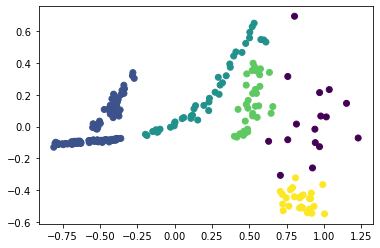

In [19]:
from sklearn.cluster import DBSCAN # DBSCAN clustering
# create model and prediction
model = DBSCAN(eps=0.1,min_samples=5) # 주변 밀집도 5으로 설정 (ln(240))
predict = pd.DataFrame(model.fit_predict(ma_pca))
predict.columns=['predict']

# concatenate labels to df as a new column
star_DBSCAN = pd.concat([ma_pca,predict],axis=1)

# 대락 0.6~0.7사이에서 노이즈가 최소화된 값들이 나오는 것 같다.
plt.scatter(star_DBSCAN.x,star_DBSCAN.y,c=star_DBSCAN['predict'])
plt.show()

In [20]:
# predict 값으로 원래 있던 값들을 분류해 보기

star.groupby(star_DBSCAN['predict']).describe().T

predict                       -1             0              1              2  \
Temperature count      16.000000    120.000000      43.000000      35.000000   
            mean    25460.000000   6737.741667   17237.000000   12905.857143   
            std     10947.622810   5849.870845   11217.412854    7902.250499   
            min      3625.000000   1939.000000    4077.000000    3008.000000   
            25%     20803.500000   3030.000000    7886.000000    4789.000000   
            50%     25245.000000   3436.500000   13089.000000   11567.000000   
            75%     33837.250000   9116.250000   27420.000000   19328.500000   
            max     40000.000000  25000.000000   39000.000000   26373.000000   
L           count      16.000000    120.000000      43.000000      35.000000   
            mean   458203.625000      0.002844   48713.847698  277107.428571   
            std    270120.493954      0.006908   92139.899020  144419.339188   
            min     74000.000000      0.000080       0.085000  112000.000000   
            25%    266745.000000      0.000435       8.310000  189500.000000   
            50%    378911.500000      0.000860     883.000000  239000.000000   
            75%    748590.000000      0.001650   15655.000000  341450.000000   
            max    849420.000000      0.056000  352000.000000  783930.000000   
R           count      16.000000    120.000000      43.000000      35.000000   
            mean     1135.931250      0.156296       6.563070      52.428571   
            std       530.605179      0.168082      10.406030      26.738698   
            min        14.000000      0.008400       0.795000      12.000000   
            25%      1002.750000      0.012075       1.570000      29.500000   
            50%      1164.250000      0.102500       5.856000      45.000000   
            75%      1390.500000      0.240000       6.520000      80.500000   
            max      1948.500000      0.730000      67.000000      98.000000   
A_M         count      16.000000    120.000000      43.000000      35.000000   
            mean       -8.820375     14.228658      -0.769465      -6.366600   
            std         1.439099      2.699811       3.786532       0.564484   
            min       -11.230000     10.120000      -6.500000      -7.450000   
            25%       -10.010000     11.920000      -3.995000      -6.835000   
            50%        -8.570000     13.725000      -1.970000      -6.240000   
            75%        -7.767500     16.680000       2.415000      -5.947500   
            max        -6.230000     20.060000       6.506000      -5.240000   

predict                        3  
Temperature count      26.000000  
            mean     4254.076923  
            std      1816.394515  
            min      3399.000000  
            25%      3539.500000  
            50%      3614.500000  
            75%      3773.000000  
            max     11000.000000  
L           count      26.000000  
            mean   253865.115385  
            std    136763.271094  
            min    100000.000000  
            25%    151250.000000  
            50%    219000.000000  
            75%    282750.000000  
            max    630000.000000  
R           count      26.000000  
            mean     1407.961538  
            std       187.867077  
            min       955.000000  
            25%      1295.500000  
            50%      1421.500000  
            75%      1531.000000  
            max      1779.000000  
A_M         count      26.000000  
            mean       -9.946923  
            std         1.483800  
            min       -11.920000  
            25%       -11.187500  
            50%       -10.700000  
            75%        -8.435000  
            max        -7.580000

In [21]:
from sklearn.manifold import TSNE

def tsne(x):
    model = TSNE(n_components=2, verbose=1, random_state=0)
    transformed = model.fit_transform(x)
    star_TSNE = pd.DataFrame(transformed, columns=['x','y'])
    return star_TSNE

In [22]:
mm_tsne = tsne(mm)
ma_tsne = tsne(ma)
ss_tsne = tsne(ss)
rs_tsne = tsne(rs)
no_tsne = tsne(no)
star_tsne = tsne(star)

[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 240 samples in 0.000s...
[t-SNE] Computed neighbors for 240 samples in 0.003s...
[t-SNE] Computed conditional probabilities for sample 240 / 240
[t-SNE] Mean sigma: 0.069456
[t-SNE] KL divergence after 250 iterations with early exaggeration: 51.181290
[t-SNE] KL divergence after 1000 iterations: 0.115166
[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 240 samples in 0.001s...
[t-SNE] Computed neighbors for 240 samples in 0.002s...
[t-SNE] Computed conditional probabilities for sample 240 / 240
[t-SNE] Mean sigma: 0.101728
[t-SNE] KL divergence after 250 iterations with early exaggeration: 50.937229
[t-SNE] KL divergence after 1000 iterations: 0.113625
[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 240 samples in 0.000s...
[t-SNE] Computed neighbors for 240 samples in 0.003s...
[t-SNE] Computed conditional probabilities for sample 240 / 240
[t-SNE] Mean sigma: 0.218021
[t-SNE] KL divergence after 250 iteratio

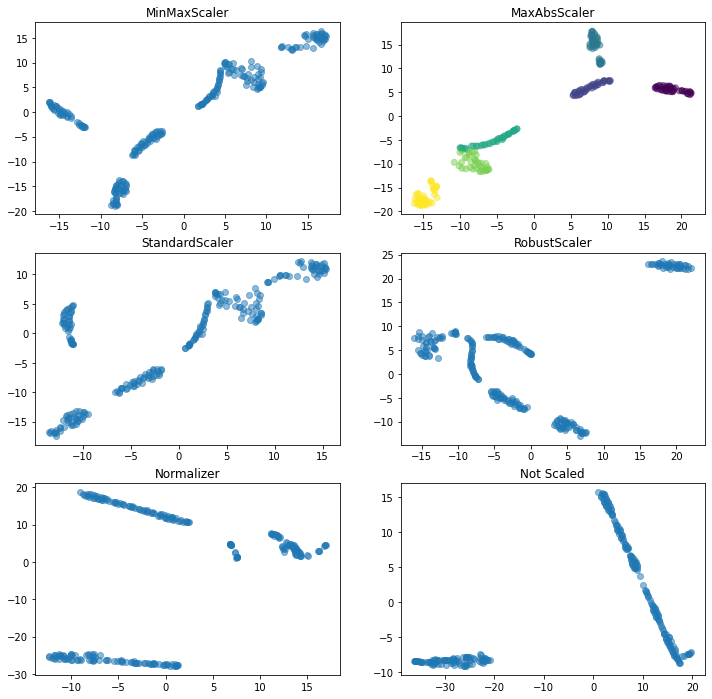

In [23]:
plt.figure(figsize=(12, 12))

plt.subplot(321)
plt.scatter(mm_tsne.x, mm_tsne.y, alpha=0.5)
plt.title('MinMaxScaler')

plt.subplot(322)
plt.scatter(ma_tsne.x, ma_tsne.y, alpha=0.5,c=Type)
plt.title('MaxAbsScaler')

plt.subplot(323)
plt.scatter(ss_tsne.x, ss_tsne.y, alpha=0.5)
plt.title('StandardScaler')

plt.subplot(324)
plt.scatter(rs_tsne.x, rs_tsne.y, alpha=0.5)
plt.title('RobustScaler')

plt.subplot(325)
plt.scatter(no_tsne.x, no_tsne.y, alpha=0.5)
plt.title('Normalizer')

plt.subplot(326)
plt.scatter(star_tsne.x, star_tsne.y, alpha=0.5)
plt.title('Not Scaled')

plt.show()